In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression






In [4]:
# Load the dataset
df = pd.read_csv('/content/sample_data/flights.csv')



In [5]:
# Check if the dataset is loaded correctly
print("Dataset shape:", df.shape)
print(df.head())

# Handle missing values
#df.fillna(df.mean(), inplace=True)



Dataset shape: (31234, 31)
   YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
0  2015      1    1            4      AS             98      N407AS   
1  2015      1    1            4      AA           2336      N3KUAA   
2  2015      1    1            4      US            840      N171US   
3  2015      1    1            4      AA            258      N3HYAA   
4  2015      1    1            4      AS            135      N527AS   

  ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ...  ARRIVAL_TIME  \
0            ANC                 SEA                    5  ...         408.0   
1            LAX                 PBI                   10  ...         741.0   
2            SFO                 CLT                   20  ...         811.0   
3            LAX                 MIA                   20  ...         756.0   
4            SEA                 ANC                   25  ...         259.0   

   ARRIVAL_DELAY  DIVERTED  CANCELLED  CANCELLATION_REASON  AIR_S

In [6]:
# Ensure the 'SCHEDULED_DEPARTURE' column is of integer type
df['SCHEDULED_DEPARTURE'] = pd.to_numeric(df['SCHEDULED_DEPARTURE'], errors='coerce')
df = df.dropna(subset=['SCHEDULED_DEPARTURE'])



In [7]:
# Create the 'FLIGHT_HOUR' feature
df['FLIGHT_HOUR'] = df['SCHEDULED_DEPARTURE'] // 100



In [8]:
# Convert categorical features to numerical using Label Encoding
label_encoder = LabelEncoder()
df['AIRLINE'] = label_encoder.fit_transform(df['AIRLINE'])
df['ORIGIN_AIRPORT'] = label_encoder.fit_transform(df['ORIGIN_AIRPORT'])
df['DESTINATION_AIRPORT'] = label_encoder.fit_transform(df['DESTINATION_AIRPORT'])



In [9]:
# Ensure necessary columns are present
columns = ['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'FLIGHT_HOUR']
missing_columns = [col for col in columns if col not in df.columns]

if missing_columns:
    print(f"Missing columns: {missing_columns}")
else:
    print("All necessary columns are present.")



All necessary columns are present.


In [10]:
# Target variable and features
X = df[columns]
y = df['ARRIVAL_DELAY']

y = y.fillna(y.mean())



In [11]:
# Check shapes of X and y
print("X shape:", X.shape)
print("y shape:", y.shape)




X shape: (31234, 9)
y shape: (31234,)


In [12]:
# Ensure that the dataset is not empty
if X.shape[0] == 0 or y.shape[0] == 0:
    raise ValueError("The dataset is empty after preprocessing. Check the data.")



In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [14]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [15]:
# Initialize and train the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)



LinearRegression()

In [16]:
# Predict and evaluate the linear regression model
y_pred_lr = lr_model.predict(X_test)
print("Linear Regression MAE:", mean_absolute_error(y_test, y_pred_lr))
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred_lr))
print("Linear Regression R²:", r2_score(y_test, y_pred_lr))



Linear Regression MAE: 19.879161999519006
Linear Regression MSE: 1154.2793778362864
Linear Regression R²: 0.02293254943772982


In [17]:
# Initialize and train the XGBoost model
#xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
#xgb_model.fit(X_train, y_train)

#xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
#xgb_model.fit(X_train, y_train)


import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train)
params = {'objective': 'reg:squarederror', 'random_state': 42}
model = xgb.train(params, dtrain, num_boost_round=100)



In [18]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Convert X_test to DMatrix
dtest = xgb.DMatrix(X_test)

# Predict using XGBoost
y_pred_xgb = model.predict(dtest)

# Evaluate the model
print("XGBoost MAE:", mean_absolute_error(y_test, y_pred_xgb))
print("XGBoost MSE:", mean_squared_error(y_test, y_pred_xgb))
print("XGBoost R²:", r2_score(y_test, y_pred_xgb))


XGBoost MAE: 18.69638142045027
XGBoost MSE: 1169.8321473345636
XGBoost R²: 0.00976753485404247


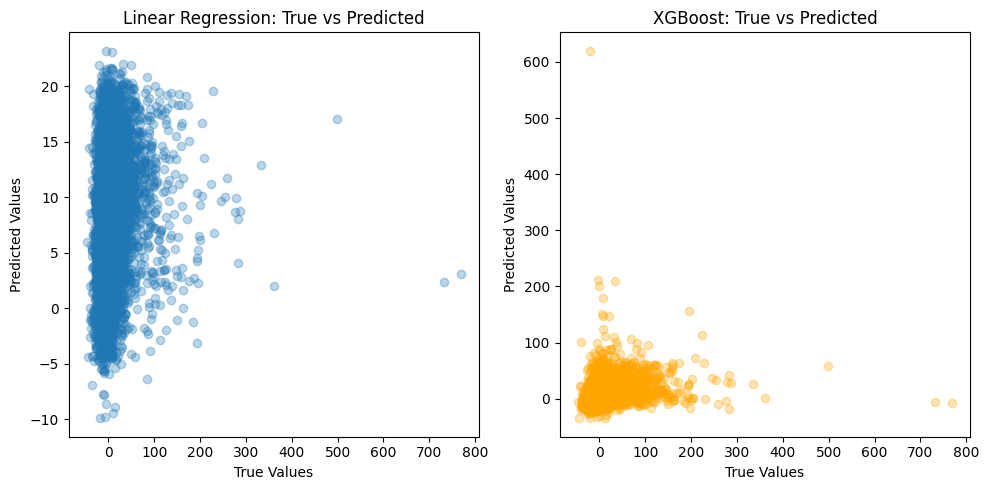

In [19]:
# Plotting the results
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lr, alpha=0.3)
plt.title('Linear Regression: True vs Predicted')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_xgb, alpha=0.3, color='orange')
plt.title('XGBoost: True vs Predicted')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

plt.tight_layout()
plt.show()